# Task 2 at Oasis Infobyte - Data Science Internship
# Project Name: Unemployment Analysis in India With Machine Learning
# Author: YUVARAJ S


# Problem Statement

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid 19, so analyzing the unemployment rate can be good data science project

The primary objective of this analysis is to conduct a comprehensive examination of regional unemployment rates in India without employing machine learning techniques. The dataset provides insights into unemployment dynamics, featuring key indicators such as the unemployment rate, estimated employment figures, and labor participation rates across different regions and time periods.

Key Objectives:

Exploration and Understanding:

Investigate the provided unemployment dataset, examining feature distributions and ensuring data integrity.
Assess the impact of the unemployment rate during the Covid-19 pandemic, identifying trends and variations.
Data Preprocessing:

Address any missing values in the dataset to ensure data completeness.
Conduct encoding of categorical variables, if applicable, for a clearer representation of data.
Univariate Analysis:

Analyze individual variables such as the unemployment rate, estimated employment figures, and labor participation rates to understand their distributions and variations.
Bivariate Analysis:

Investigate relationships between pairs of variables, exploring how the unemployment rate correlates with estimated employment figures and labor participation rates.
Multivariate Analysis:

Examine the simultaneous interactions between multiple variables, aiming to uncover complex patterns and trends.

## Import libraries <a class="anchor" id="1"></a>


The first step in building the model is to import the necessary libraries.

In [1]:
import numpy as np  # Importing NumPy library for numerical operations
import pandas as pd  # Importing Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for statistical data visualization
%matplotlib inline  

Loading the dataset into the notebook

In [2]:
import os
os.getcwd()

'c:\\Users\\Yuvaraj s\\Desktop\\Oasis - INT\\Unemployment'

In [3]:

df = pd.read_csv('dataset/unemployment_in_india.csv')

## To display top five data of the dataset <a class="anchor" id="3"></a>

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## To check tuple representing the dimensions (number of rows, number of columns) of the DataFrame<a class="anchor" id="4.5"></a>

In [5]:
df.shape

(768, 7)

## Display the summary of the dataset it includes the information of datatypes and the usage of memory,index and non-null values<a class="anchor" id="4.5"></a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
df.info(memory_usage=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)

## Display the column labels (names) <a class="anchor" id="4.5"></a>

In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

## Statistical Descriptive Analysis

In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## 1. Summary statistics of numerical columns

In [10]:
df.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## 2. Show the count of missing values for each column.<a class="anchor" id="4"></a>


In [11]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [12]:
df.dropna(axis = 0,inplace= True)

In [13]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## 3. Display the unique values in the 'Region' column


In [14]:
unique_regions = df['Region'].unique()
print(unique_regions)

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']


## 4. To check if both the datasets are null or not


In [15]:
print(df.isnull())

     Region   Date   Frequency   Estimated Unemployment Rate (%)   
0     False  False       False                             False  \
1     False  False       False                             False   
2     False  False       False                             False   
3     False  False       False                             False   
4     False  False       False                             False   
..      ...    ...         ...                               ...   
749   False  False       False                             False   
750   False  False       False                             False   
751   False  False       False                             False   
752   False  False       False                             False   
753   False  False       False                             False   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0                  False                                     False  False  
1                  False       

## 5. Value counts for dataset


In [16]:
print("For the dataset-Unemployment in India: ")
print(df.isnull().value_counts())

For the dataset-Unemployment in India: 
Region   Date   Frequency   Estimated Unemployment Rate (%)   Estimated Employed   Estimated Labour Participation Rate (%)  Area 
False   False  False       False                             False                False                                     False    740
Name: count, dtype: int64


## 6. What is the purpose of the code snippet where the 'Frequency' column in the DataFrame is mapped to a new value based on the given dictionary, and what impact does this mapping have on the 'Frequency' values in the dataset?

In [17]:
df[' Frequency'] = df[' Frequency'].map({" Monthly":"/Month",
                                            "Monthly":"/Month"})
print(df[' Frequency'])

0      /Month
1      /Month
2      /Month
3      /Month
4      /Month
        ...  
749    /Month
750    /Month
751    /Month
752    /Month
753    /Month
Name:  Frequency, Length: 740, dtype: object


## EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

## 1. What is the distribution of Estimated Unemployment Rate (%) across regions?



In [18]:
# Display the column names to identify any issues
column_names = df.columns
print(column_names)

# Check for extra spaces in column names and remove if necessary
df.columns = df.columns.str.strip()

# Confirm the changes
column_names_after_stripping = df.columns
print(column_names_after_stripping)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')



## 2. How does the Estimated Employed vary across different regions?


In [19]:
df.groupby('Region')['Estimated Employed'].mean()


Region
Andhra Pradesh      8.154093e+06
Assam               5.354772e+06
Bihar               1.236619e+07
Chandigarh          3.168312e+05
Chhattisgarh        4.303499e+06
Delhi               2.627513e+06
Goa                 2.263083e+05
Gujarat             1.140201e+07
Haryana             3.557072e+06
Himachal Pradesh    1.059824e+06
Jammu & Kashmir     1.799932e+06
Jharkhand           4.469240e+06
Karnataka           1.066712e+07
Kerala              4.425900e+06
Madhya Pradesh      1.111548e+07
Maharashtra         1.999020e+07
Meghalaya           6.897368e+05
Odisha              6.545747e+06
Puducherry          2.122781e+05
Punjab              4.539362e+06
Rajasthan           1.004106e+07
Sikkim              1.068807e+05
Tamil Nadu          1.226955e+07
Telangana           7.939663e+06
Tripura             7.170026e+05
Uttar Pradesh       2.809483e+07
Uttarakhand         1.390228e+06
West Bengal         1.719854e+07
Name: Estimated Employed, dtype: float64


## 3. What is the range of Labour Participation Rate (%) in the dataset?


In [20]:
labour_participation_rate_range = df['Estimated Labour Participation Rate (%)'].max() - df['Estimated Labour Participation Rate (%)'].min()
print(labour_participation_rate_range)

59.239999999999995



## 4. What are the unique frequencies present in the 'Frequency' column?


In [21]:
unique_frequencies = df['Frequency'].unique()
print(unique_frequencies)

['/Month']



## 5. How many data points are there for each region in the dataset?


In [22]:
data_points_per_region = df['Region'].value_counts()
print(data_points_per_region)

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64



## 6. What is the proportion of data points for Rural and Urban areas in the 'Area' column?


In [23]:
area_proportion = df['Area'].value_counts(normalize=True)
print(area_proportion)

Area
Urban    0.514865
Rural    0.485135
Name: proportion, dtype: float64


## 7. What is the earliest and latest Date present in the dataset?


In [24]:
earliest_date = df['Date'].min()
print('Earliest Date:',earliest_date)
latest_date = df['Date'].max()
print('Latest Date:',latest_date)


Earliest Date:  29-02-2020
Latest Date:  31-12-2019



## 8. What is the average Estimated Unemployment Rate (%) for each Frequency category?


In [25]:
average_unemployment_rate_by_frequency = df.groupby('Frequency')['Estimated Unemployment Rate (%)'].mean()
print(average_unemployment_rate_by_frequency)

Frequency
/Month    11.787946
Name: Estimated Unemployment Rate (%), dtype: float64



## 9. How many unique regions are there in the dataset?


In [26]:
unique_regions_count = df['Region'].nunique()
print(unique_regions_count)

28


## 10. What is the median Estimated Employed for each region?


In [27]:
median_employed_by_region = df.groupby('Region')['Estimated Employed'].median()
print(median_employed_by_region)

Region
Andhra Pradesh       6873608.0
Assam                1731070.5
Bihar                8649591.5
Chandigarh            322063.0
Chhattisgarh         3934763.5
Delhi                1261275.5
Goa                   213440.0
Gujarat             10679732.0
Haryana              3379691.5
Himachal Pradesh      615690.5
Jammu & Kashmir      2049617.0
Jharkhand            2904030.5
Karnataka            9278117.5
Kerala               4603603.0
Madhya Pradesh       9967265.5
Maharashtra         17441540.5
Meghalaya             803118.0
Odisha               4078459.0
Puducherry            184228.5
Punjab               3664804.5
Rajasthan            9217777.0
Sikkim                 89702.0
Tamil Nadu          12139181.0
Telangana            6596048.0
Tripura               562677.0
Uttar Pradesh       26384943.5
Uttarakhand           989470.0
West Bengal         14547931.5
Name: Estimated Employed, dtype: float64


## BIVARIATE ANALYSIS

## 1. How does the Unemployment Rate vary over time (Date)?



C:\Users\Yuvaraj s\AppData\Local\Temp\ipykernel_11908\1574345653.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


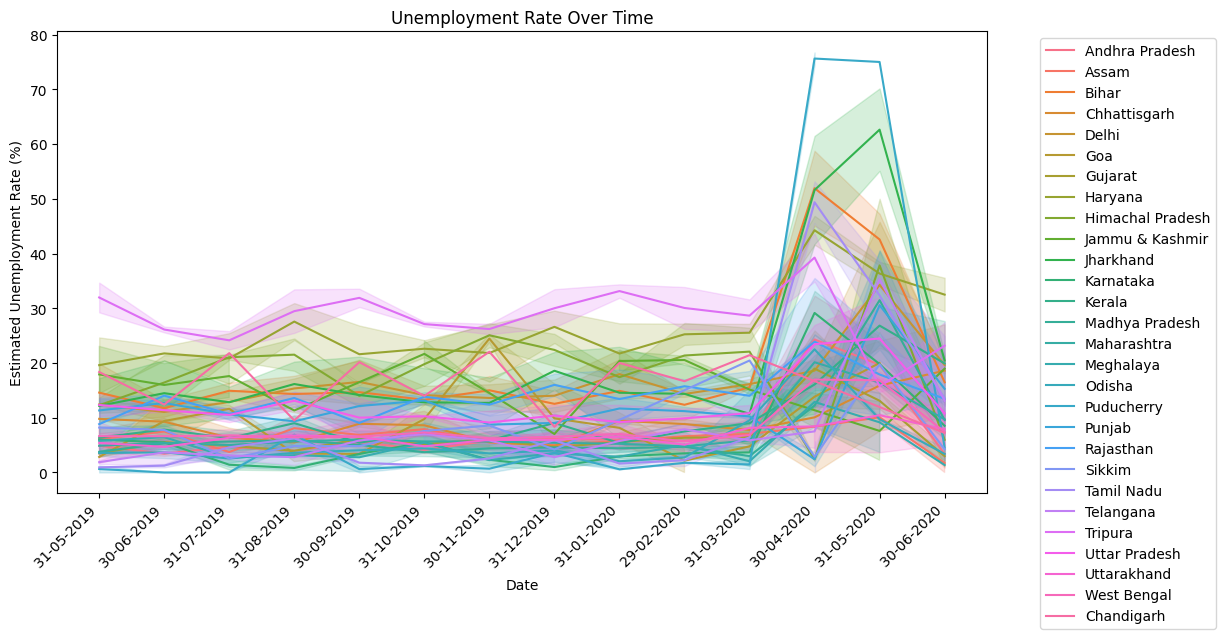

In [28]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.title('Unemployment Rate Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()


## 2. Is there a correlation between Unemployment Rate and Employed count?


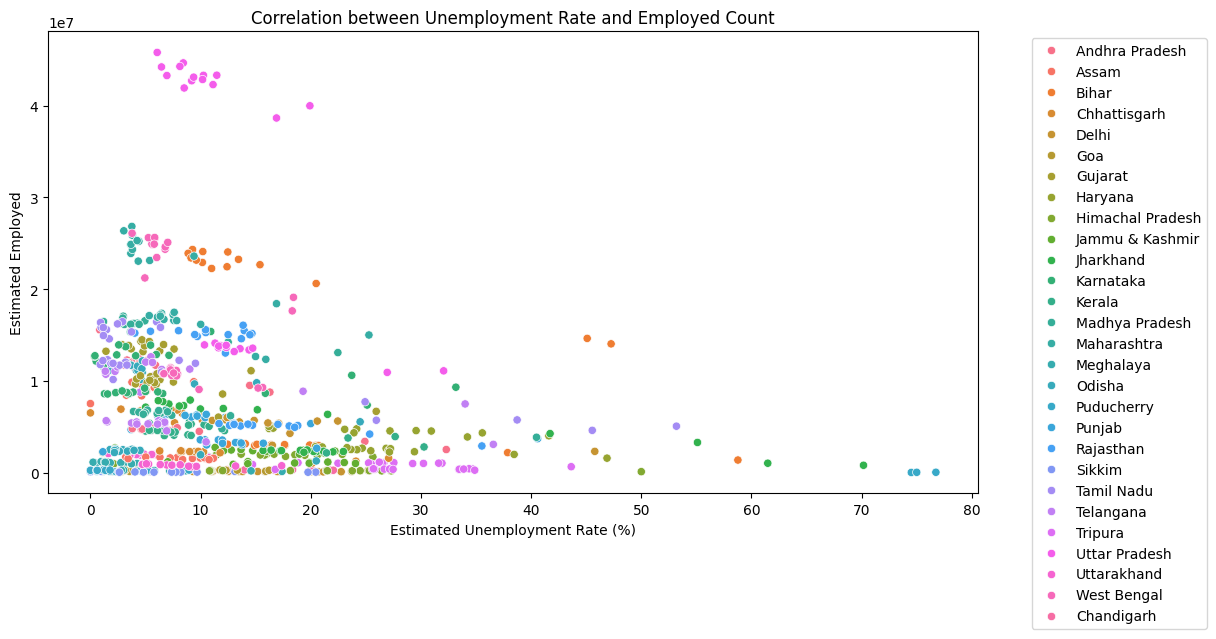

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Employed', hue='Region')
plt.title('Correlation between Unemployment Rate and Employed Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()



## 3. How does Labour Participation Rate vary across different Regions?


C:\Users\Yuvaraj s\AppData\Local\Temp\ipykernel_11908\1477655785.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


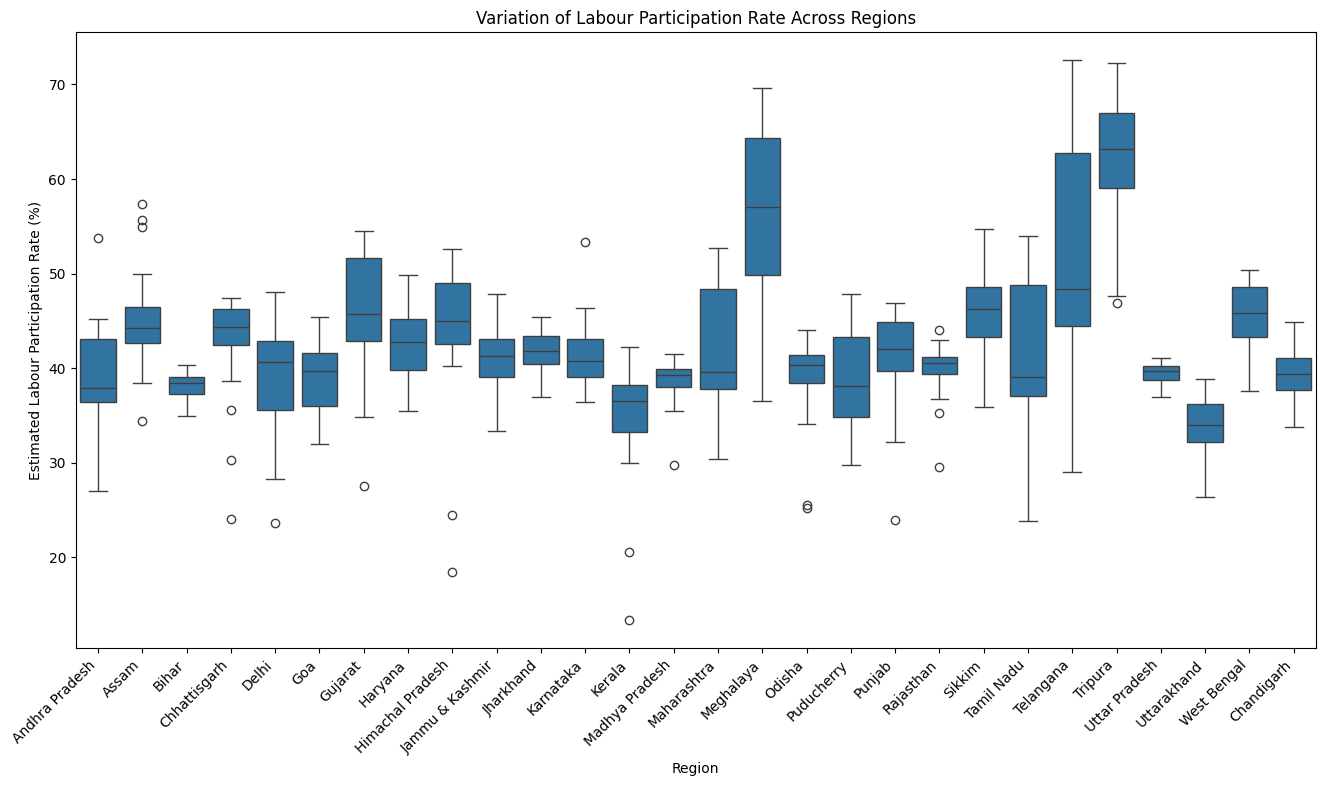

In [30]:

plt.figure(figsize=(16, 8))
plot = sns.boxplot(data=df, x='Region', y='Estimated Labour Participation Rate (%)')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Variation of Labour Participation Rate Across Regions')
plt.show()



## 4. What is the relationship between Unemployment Rate and Frequency of data collection?


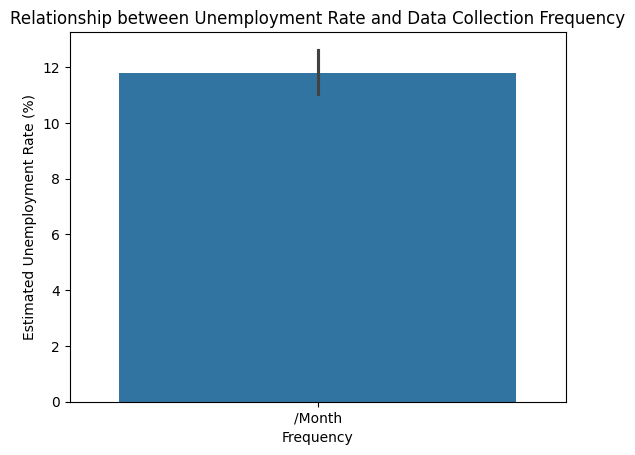

In [31]:
sns.barplot(data=df, x='Frequency', y='Estimated Unemployment Rate (%)')
plt.title('Relationship between Unemployment Rate and Data Collection Frequency')
plt.show()



## 5. Is there a difference in Unemployment Rate between Rural and Urban areas?


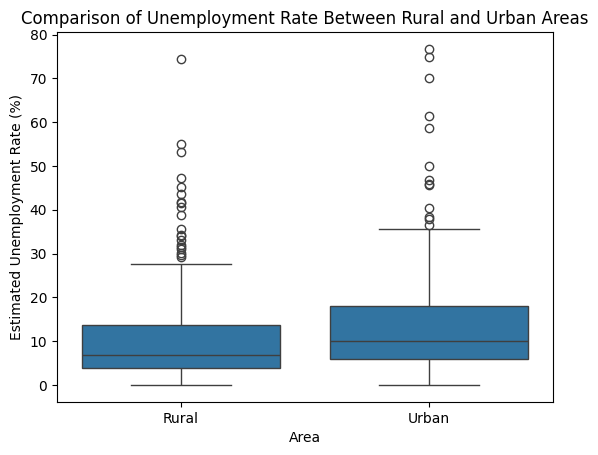

In [32]:
sns.boxplot(data=df, x='Area', y='Estimated Unemployment Rate (%)')
plt.title('Comparison of Unemployment Rate Between Rural and Urban Areas')
plt.show()



## 6. How does Employed count vary with Labour Participation Rate?


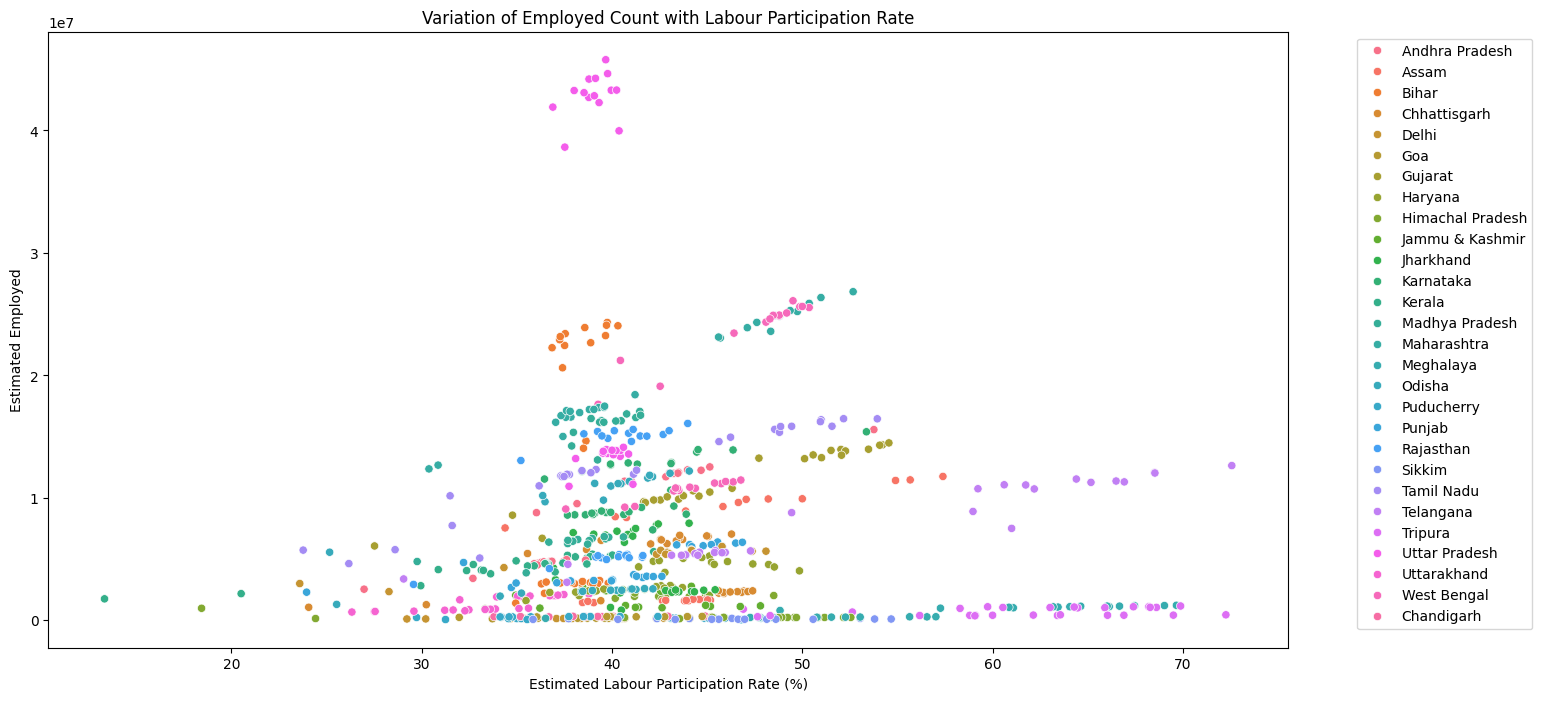

In [33]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='Estimated Labour Participation Rate (%)', y='Estimated Employed', hue='Region')
plt.title('Variation of Employed Count with Labour Participation Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()





## 7. Does Unemployment Rate show a trend over different Regions and Dates?


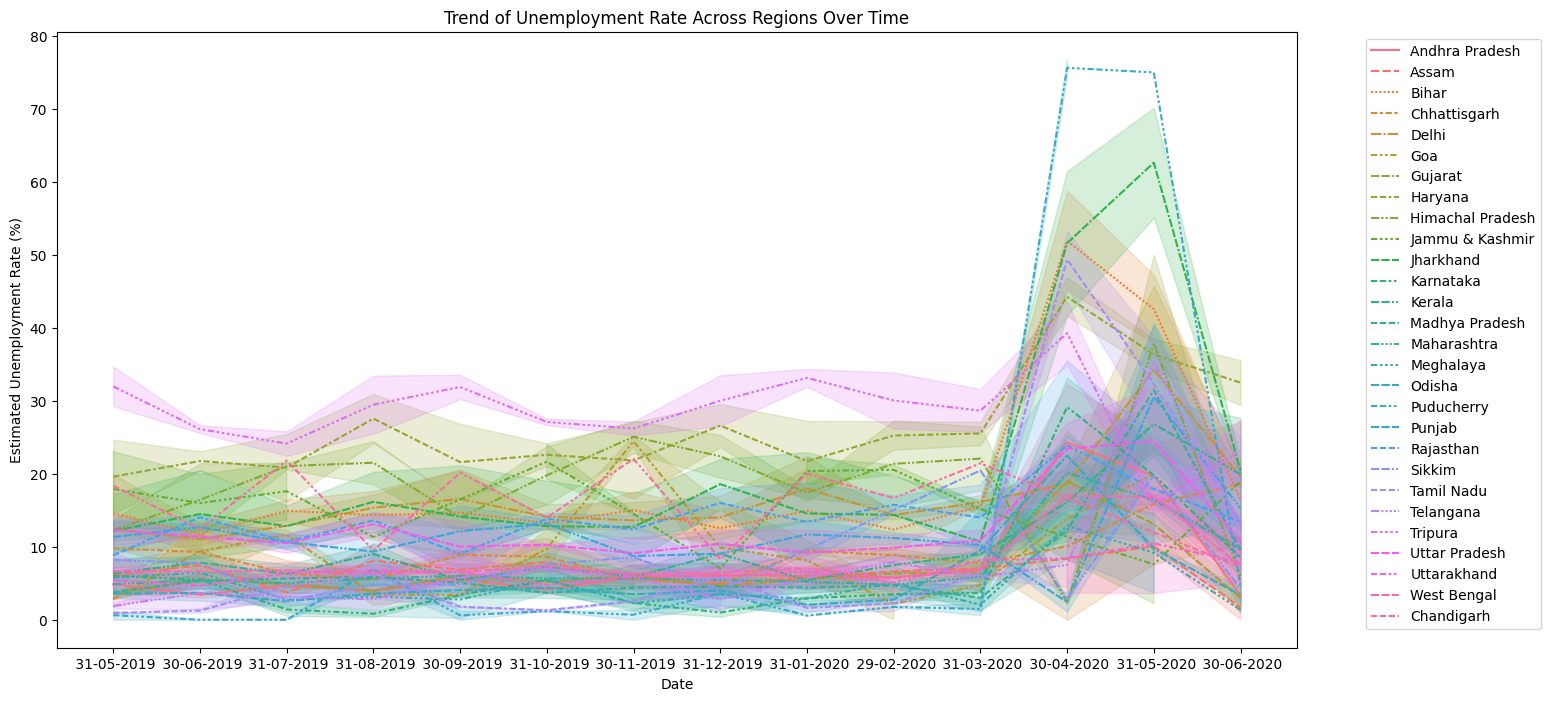

In [34]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', style='Region')
plt.title('Trend of Unemployment Rate Across Regions Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()



## 8. What is the distribution of Unemployment Rate in different Regions?


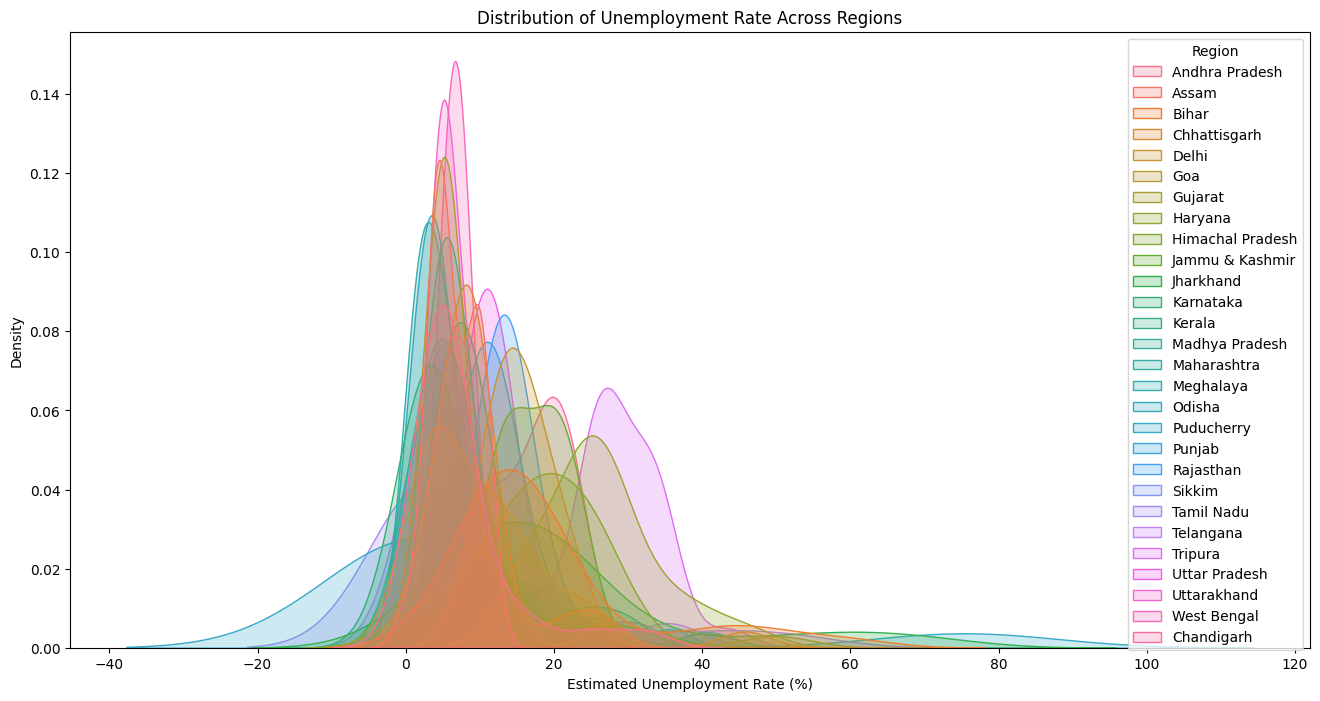

In [35]:
plt.figure(figsize=(16, 8))
sns.kdeplot(data=df, x='Estimated Unemployment Rate (%)', hue='Region', fill=True, common_norm=False)
plt.title('Distribution of Unemployment Rate Across Regions')
plt.show()



## 9. How does Employed count vary in Rural and Urban areas?


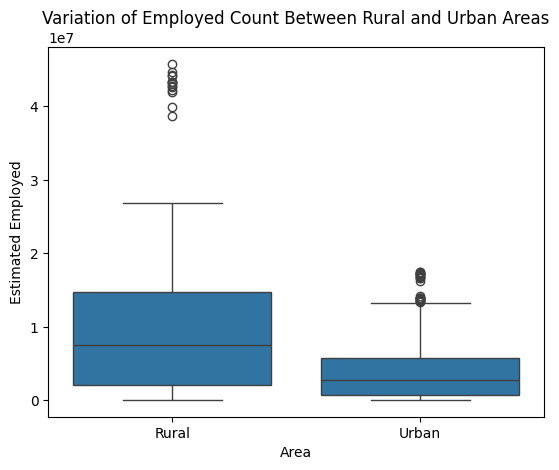

In [36]:
sns.boxplot(data=df, x='Area', y='Estimated Employed')
plt.title('Variation of Employed Count Between Rural and Urban Areas')
plt.show()



## 10. Is there a correlation between Labour Participation Rate and Unemployment Rate?


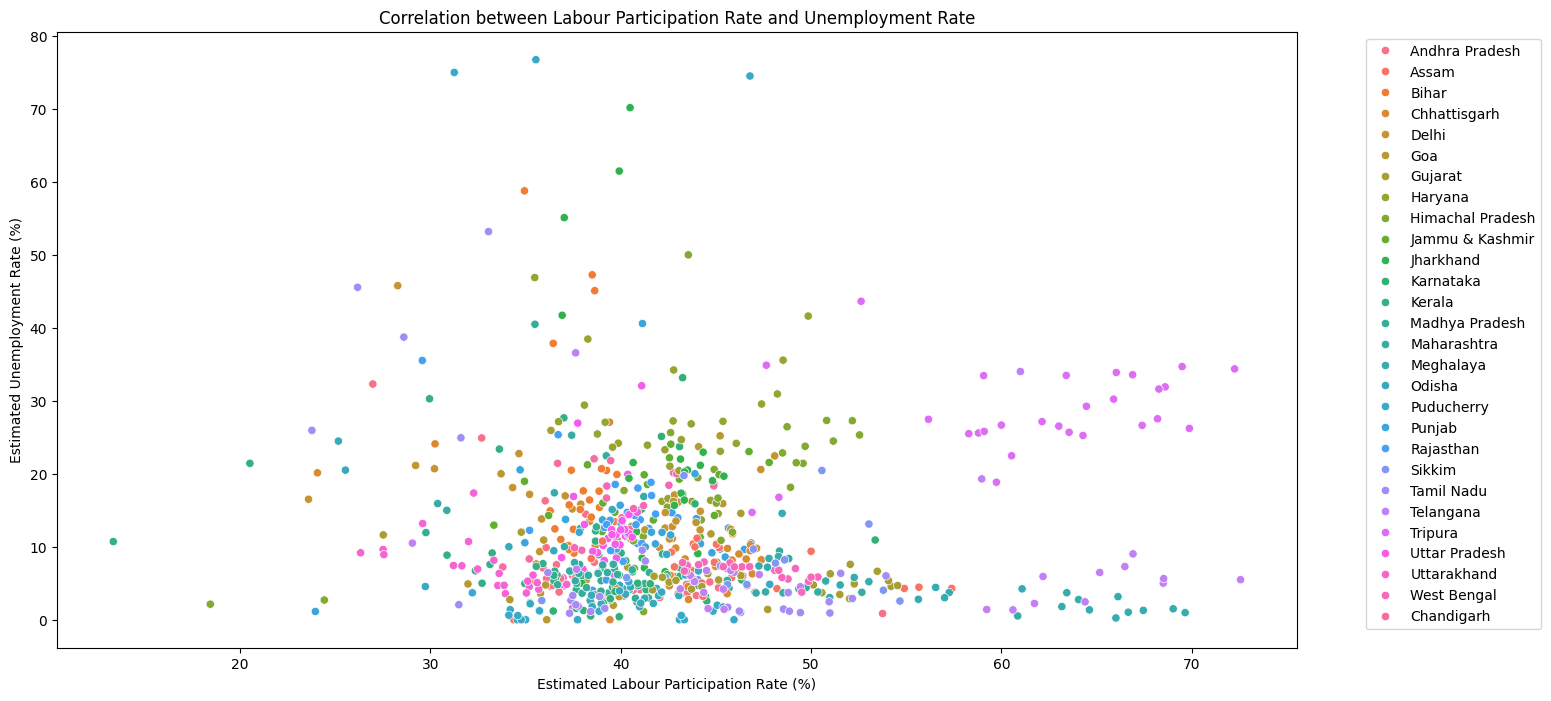

In [37]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Correlation between Labour Participation Rate and Unemployment Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()

## MULTIVARIATE ANALYSIS

## 1. How does Unemployment Rate vary with Employed count and Labour Participation Rate?

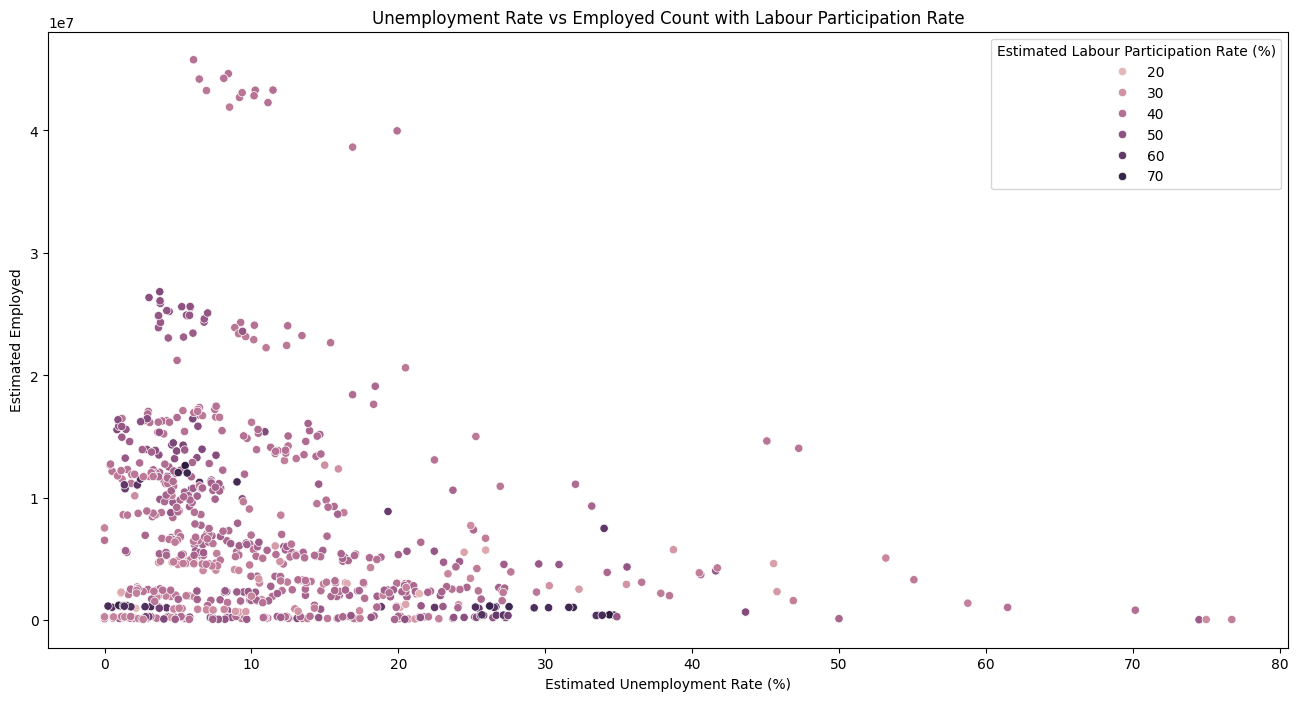

In [40]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Employed', hue='Estimated Labour Participation Rate (%)')
plt.title('Unemployment Rate vs Employed Count with Labour Participation Rate')
plt.show()



## 2. What is the distribution of Unemployment Rate in different Areas considering Employed count?


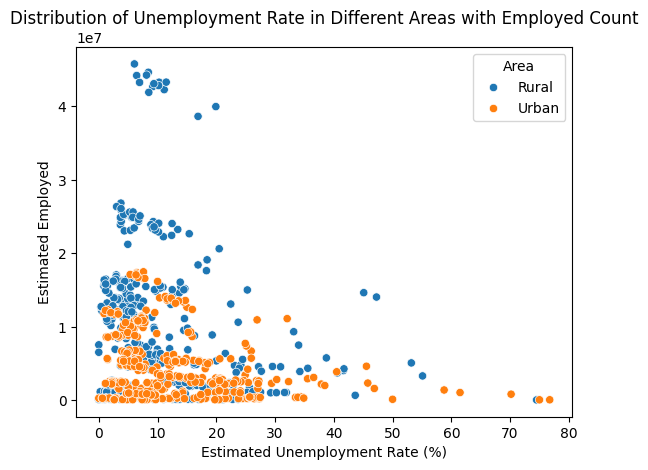

In [41]:
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Employed', hue='Area')
plt.title('Distribution of Unemployment Rate in Different Areas with Employed Count')
plt.show()



## 3. How does Labour Participation Rate vary with Unemployment Rate across Regions?


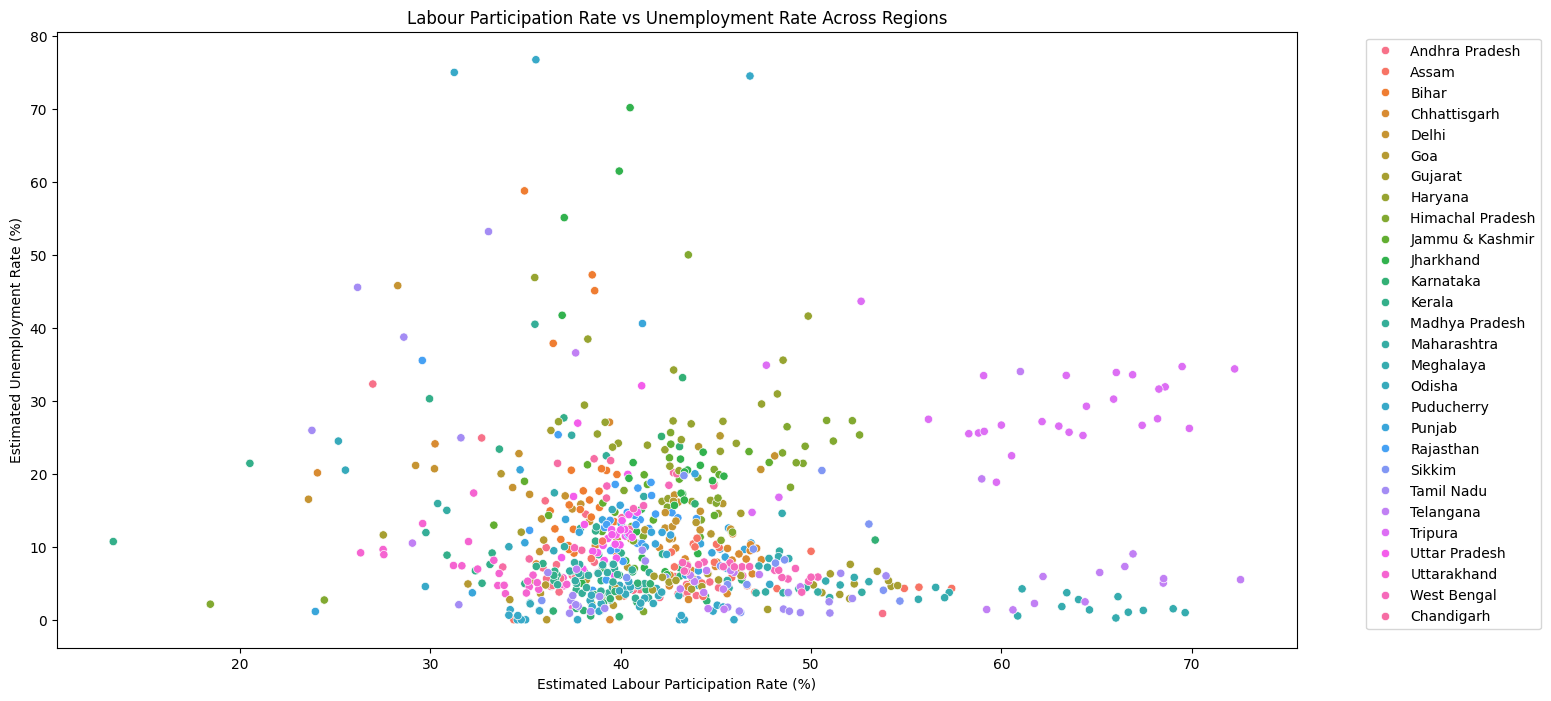

In [47]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Labour Participation Rate vs Unemployment Rate Across Regions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()


## 4. Is there a correlation between Unemployment Rate and Labour Participation Rate based on Frequency?


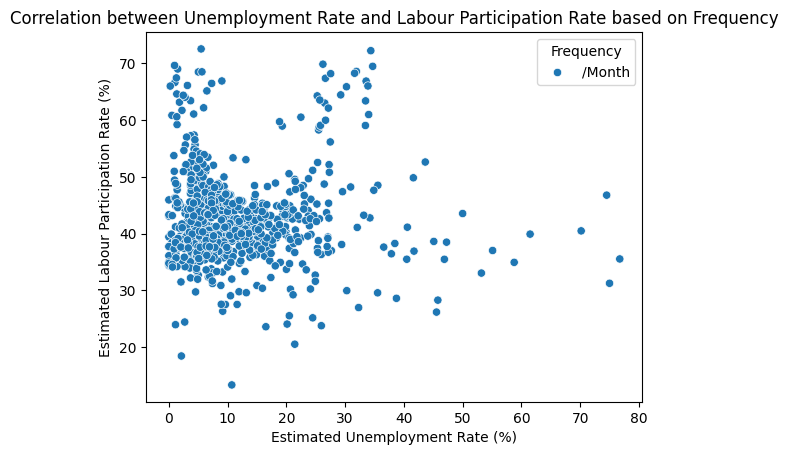

In [44]:
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', hue='Frequency')
plt.title('Correlation between Unemployment Rate and Labour Participation Rate based on Frequency')
plt.show()



## 5. How does Unemployment Rate vary with Labour Participation Rate in different Areas?


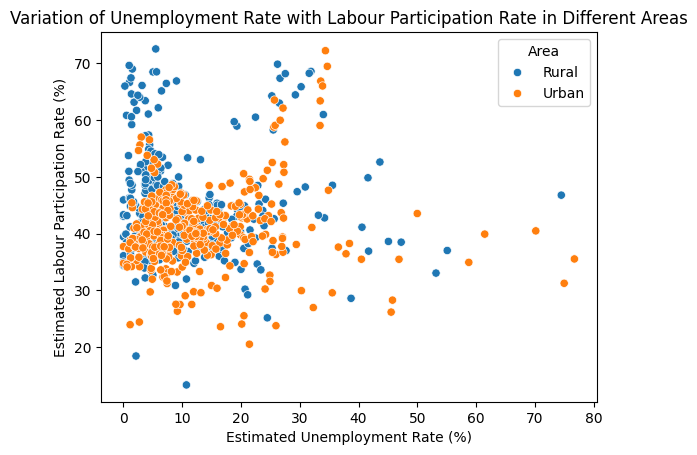

In [45]:
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', hue='Area')
plt.title('Variation of Unemployment Rate with Labour Participation Rate in Different Areas')
plt.show()



## 6. What is the relationship between Unemployment Rate, Employed count, and Labour Participation Rate in different Regions?


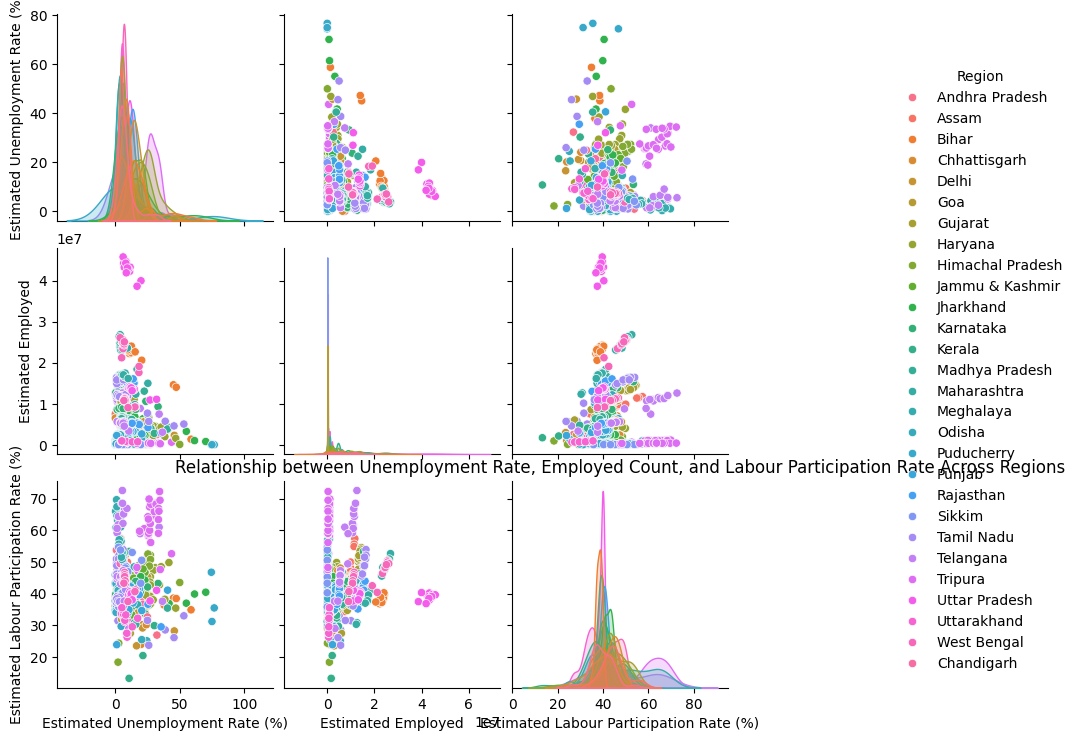

In [49]:
sns.pairplot(data=df, hue='Region', vars=['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)'])
plt.title('Relationship between Unemployment Rate, Employed Count, and Labour Participation Rate Across Regions')
plt.show()

## 7. Correlation between the features of this dataset

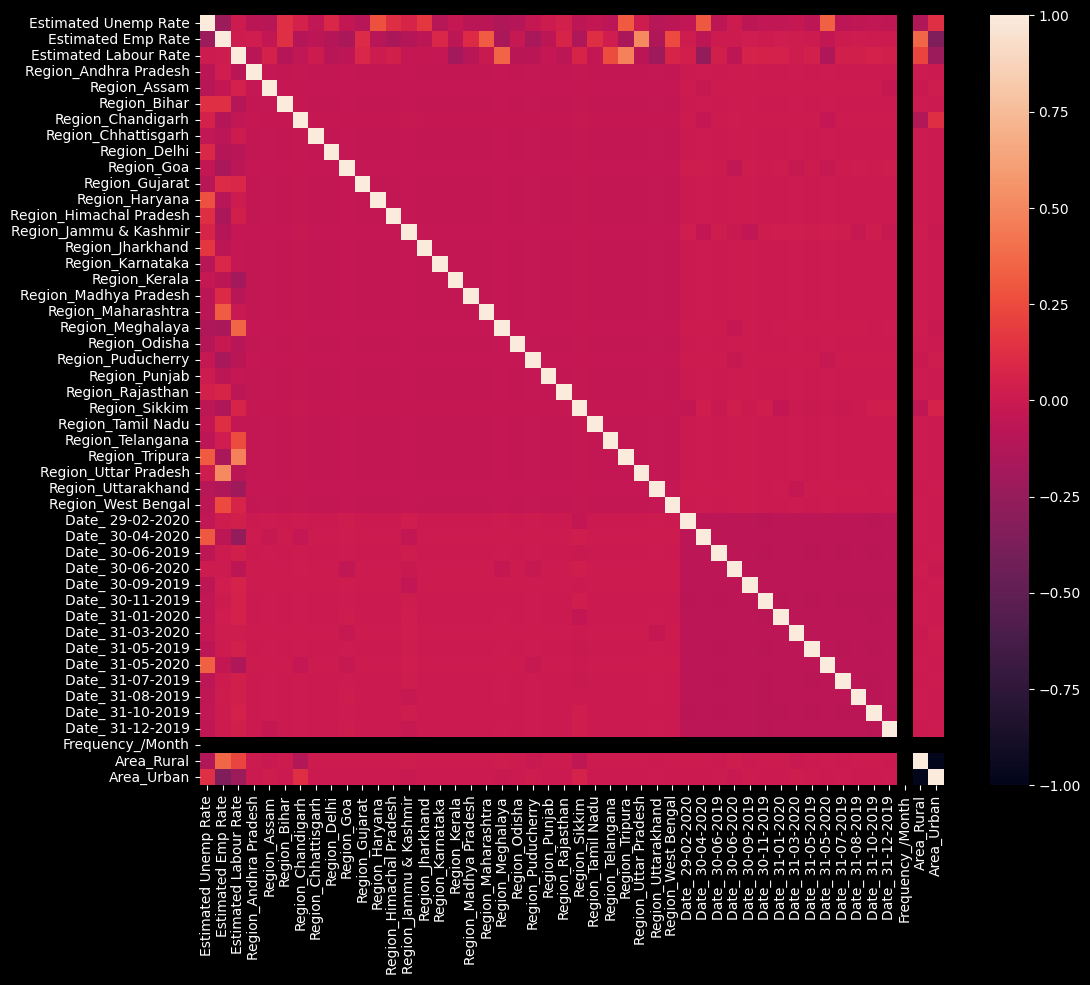

In [58]:
encode=pd.get_dummies(df)
encode
plt.figure(figsize=(12, 10))
sns.heatmap(encode.corr())
plt.show()